# Clustering Example
## By Mohammed Azhari Gasim Ahmed
### Email: mohammedagasim@gmail.com

This project is made up of three sections:

* Data Retrieval
* Data Manipulation
* Hierarchical Clustering - An application of Machine Learning

This project is for the purpose of demonstrating my knowledge of:

* Machine Learning - Clustering
* Data visualization
* Data presentation and management needs

In this example I will use a dataset containing a list of schools, their fees, and ratings. This dataset was sourced from Kaggle. By clustering school attributes, I attempt to find out which schools are of highest value in terms of fees versus rating.

I purposely use a simple dataset and only cluster two attributes. Doing so allows me to include a demonstration of data visualization as well.

### Data Retrieval

I will import the data, stored in csv format, using the pandas library.

In [1]:
import pandas as pd # importing the module
dataset = pd.read_csv('School Details.csv') # importing the dataset
dataset.head() # prints the first 5 rows of the dataset

,SchoolID,Curriculum,AnnualFees,Rating
0,1,Pakistani,15,39
1,2,Indian,15,81
2,3,Pakistani,16,6
3,4,French,16,77
4,5,Iranian,17,40


In [2]:
print(f'Number of Schools: {len(dataset)}') # prints the number of rows (or schools) in the dataset

Number of Schools: 200


The dataset contains information on 200 schools. There are 4 columns representing attributes:

* School ID
* Curriculum
* Annual Fees (in thousands)
* Rating (1 to 100)

### Data Manipulation

Let's take a closer and familiarize ourselves with the dataset.

To begin with, I will group the schools by curriculum and count the number of schools following each one.

In [3]:
grouped_by_cur = dataset.groupby(['Curriculum']).SchoolID.count().reset_index() # grouping the dataset by curriculum
grouped_by_cur = grouped_by_cur.rename(columns = {'SchoolID': 'Count'}) # for ease of analysis
grouped_by_cur # prints the table

,Curriculum,Count
0,American,29
1,British,24
2,French,26
3,German,33
4,Indian,20
5,Iranian,37
6,Pakistani,31


The schools in the dataset follow 7 different curriculums.

In [4]:
grouped_for_fees = dataset.groupby(['Curriculum']).AnnualFees.mean().reset_index() # grouping the dataset
grouped_for_fees = grouped_for_fees.rename(columns = {'AnnualFees': 'AverageFees'}) # for ease of analysis
grouped_for_fees # prints the table

,Curriculum,AverageFees
0,American,56.034483
1,British,60.625000
2,French,59.884615
3,German,66.939394
4,Indian,67.000000
5,Iranian,60.783784
6,Pakistani,54.096774


Let's take a look at the average fees by curriculum. Using matplotlib, we can plot these on a bar chart for presentation to management.

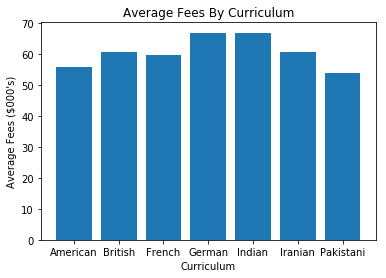

In [5]:
import matplotlib.pyplot as plt # importing the module
%matplotlib inline
plt.bar(grouped_for_fees.Curriculum, grouped_for_fees.AverageFees) # ploting the bar chart
plt.xlabel('Curriculum') # x-axis label
plt.ylabel('Average Fees ($000\'s)') # y-axis label
plt.title('Average Fees By Curriculum') # chart title
plt.show() # prints the bar chart

We can create another table for the average rating, then join the three to create a pivot table:

In [6]:
grouped_for_rating = dataset.groupby(['Curriculum']).Rating.mean().reset_index() # grouping the dataset
grouped_for_rating = grouped_for_rating.rename(columns = {'Rating': 'AverageRating'}) # for ease of analysis
pivot = pd.merge(grouped_by_cur, grouped_for_fees, left_on='Curriculum', right_on='Curriculum') # joining dataframes
pivot = pd.merge(pivot, grouped_for_rating, left_on='Curriculum', right_on='Curriculum') # joining dataframes
pivot = pivot.sort_values('AverageRating', ascending = False) # sorting by Average Rating
pivot # prints the table

,Curriculum,Count,AverageFees,AverageRating
0,American,29,56.034483,57.827586
5,Iranian,37,60.783784,53.378378
1,British,24,60.625000,51.416667
4,Indian,20,67.000000,48.250000
6,Pakistani,31,54.096774,48.064516
2,French,26,59.884615,46.538462
3,German,33,66.939394,45.121212


The above pivot table is sorted by average rating in descending order. American schools have the highest rating on average, while German schools have the lowest.

Ranking only by rating, however, is not particularly informative however. A better analysis would determine the value each school provides to parents and students; the value being a function of both rating **and fees**. Furthermore, while grouped data can provide a quick summary, it does not allow for the **granular and actionable** analysis policymakers and regulators need.

### Hierarchical Clustering - An application of Machine Learning

A good solution to the issues raised above is to apply a machine learning model. By clustering each school's annual fees and rating, the attributes that together determine value, 'successful' and 'lagging' schools can be identified.

To determine the value provided by each school we will apply hierarchical clustering to the dataset. The first step is to create our matrix of features (annual fees and rating). We will use the numpy library in the process of doing so.

In [7]:
import numpy as np # importing the module
X = dataset.iloc[:, 2:4].values # extracting the features from the dataset and creating a numpy matrix

We next need to determine the optimal number of clusters using a dendrogram. We can create a dendrogram using the SciPy Cluster Hierarchy (sch) class found in the SciPy library. We will use the ward method in order, which minimizes the variance within each cluster to determine its members.

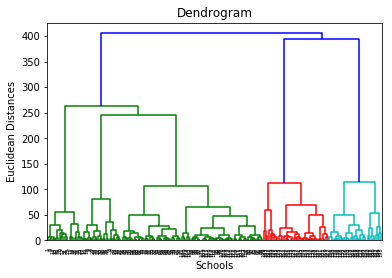

In [8]:
import scipy.cluster.hierarchy as sch # importing the module
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # creating the dendrogram
plt.xlabel('Schools') # x-axis label
plt.ylabel('Euclidean Distances') # y-axis label
plt.title('Dendrogram') # plot title
plt.show() # prints the dendrogram

The dendrogram above shows all of the possible clusters. For this simple example we determine the number of clusters visually. Based on the euclidean distances, the optimal number of clusters is five. The next step is to fit the hierarchical clustering algorithm to our data using using SciKit-Learn, a machine learning library.

In [9]:
from sklearn.cluster import AgglomerativeClustering # importing the module
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') # creating an instance of class
y_hc = hc.fit_predict(X) # fitting the data to the object
y_hc # prints the results

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

The data has now been fit to the cluster model, and the variable y_hc stores the clusters. Plotting the results will help us label the clusters:

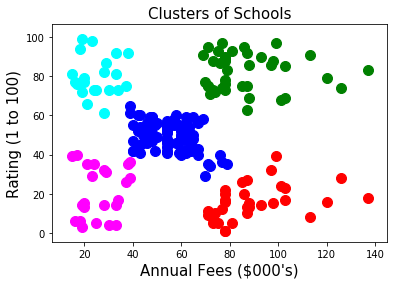

In [10]:
# plotting the clusters using matplotlib.pyplot
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta')
plt.title('Clusters of Schools', fontsize = 15)
plt.xlabel('Annual Fees ($000\'s)', fontsize = 15)
plt.ylabel('Rating (1 to 100)', fontsize = 15)
plt.show()

The above plot shows five clear clusters. The schools in cyan (cluster 3) clustered on the top left of the scatter plot are schools that have high ratings but low annual fees, and thus can be said to deliver high value to parents and students. The schools in red (cluster 0) clustered on the bottom right of the scatter plot, however, are low value schools. These are expensive schools with poor ratings. The rest of the clusters can be labeled in a similar fashion.

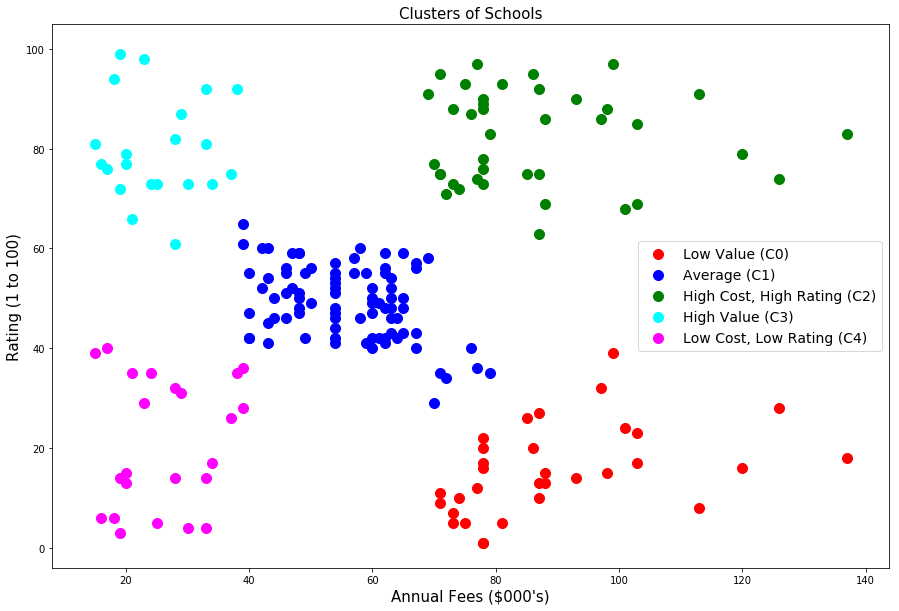

In [11]:
# adding labels and legend
plt.figure(figsize = (15, 10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Value (C0)')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average (C1)')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Cost, High Rating (C2)')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'High Value (C3)')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Low Cost, Low Rating (C4)')
plt.title('Clusters of Schools', fontsize = 15)
plt.xlabel('Annual Fees ($000\'s)', fontsize = 15)
plt.ylabel('Rating (1 to 100)', fontsize = 15)
plt.legend(fontsize = 14)
plt.show()

The above plot visualizes the clusters nicely and can be used in presentations to management. To make the results **actionable** we can append the results to the original dataset and thereby labeling each school.

In [12]:
clusters = pd.DataFrame({'Cluster': y_hc}) # saving results in dataframe in preparation for join
dataset['Cluster'] = clusters.Cluster # appending results to dataset
value_dict = {0: 'Low Value', 1: 'Average', 2: 'High Cost', 3: 'High Value', 4: 'Low Cost'} # dictionary for labeling
dataset['Value'] = dataset.Cluster.apply(lambda x: value_dict[x]) # labeling
dataset['Value'] = pd.Categorical(dataset['Value'], ['High Value', 'High Cost', 'Average', 'Low Cost', 'Low Value'])
dataset = dataset.sort_values('Value').reset_index(drop = True) # sorting
dataset # prints the entire dataset

,SchoolID,Curriculum,AnnualFees,Rating,Cluster,Value
0,20,American,23,98,3,High Value
1,38,American,34,73,3,High Value
2,36,Iranian,33,81,3,High Value
3,34,American,33,92,3,High Value
4,32,French,30,73,3,High Value
5,30,Iranian,29,87,3,High Value
6,28,American,28,61,3,High Value
7,26,American,28,82,3,High Value
8,24,American,25,73,3,High Value
9,22,German,24,73,3,High Value


The table above labels each school in our dataset as high value, high cost, average, low cost, or low value. High value schools could be visited and best practices determined. Other schools can then be encouraged to adopt those practices. 

A pivot table may also be helpful during a presentation to management.

In [13]:
grouped = dataset.groupby(['Curriculum', 'Value']).Cluster.count().reset_index() # grouping the dataset
pivot = grouped.pivot(columns = 'Value', index = 'Curriculum', values = 'Cluster') # pivoting
pivot['Low Cost'].fillna(0, inplace=True) # replacing NaN values with 0
pivot = pivot.astype(int) # converting to integers for ease of analysis
pivot # prints pivot table

Value,High Value,High Cost,Average,Low Cost,Low Value
Curriculum,,,,,
American,8,5,11,1,4
British,3,6,7,3,5
French,2,4,13,4,3
German,2,6,13,3,9
Indian,1,4,11,0,4
Iranian,4,8,15,5,5
Pakistani,1,6,15,7,2


## End